# Project - Forest Fire - (Population Density Data Extraction)

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

In [2]:
%%capture
%run fire.ipynb

Population Data is included in the Data folder\
Population Data source: https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-rev11

## Read Data & Plot Population density map
We will use these maps to find the population density based on Longitude & Latitude

<AxesSubplot:>

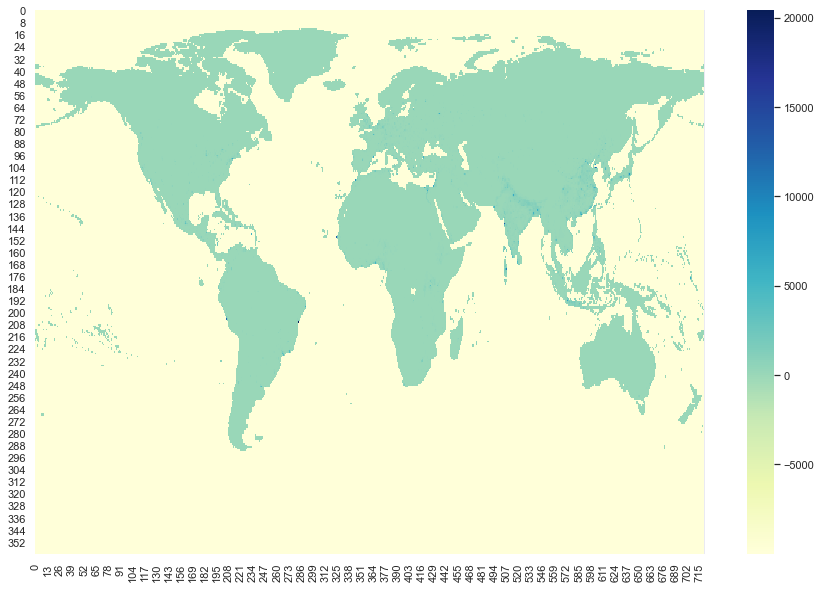

In [3]:
density2010 = pd.read_csv('Data/gpw_v4_population_density_rev11_2010_30_min .asc', sep=' ', header=None)
sns.heatmap(density2010, cmap='YlGnBu')

<AxesSubplot:>

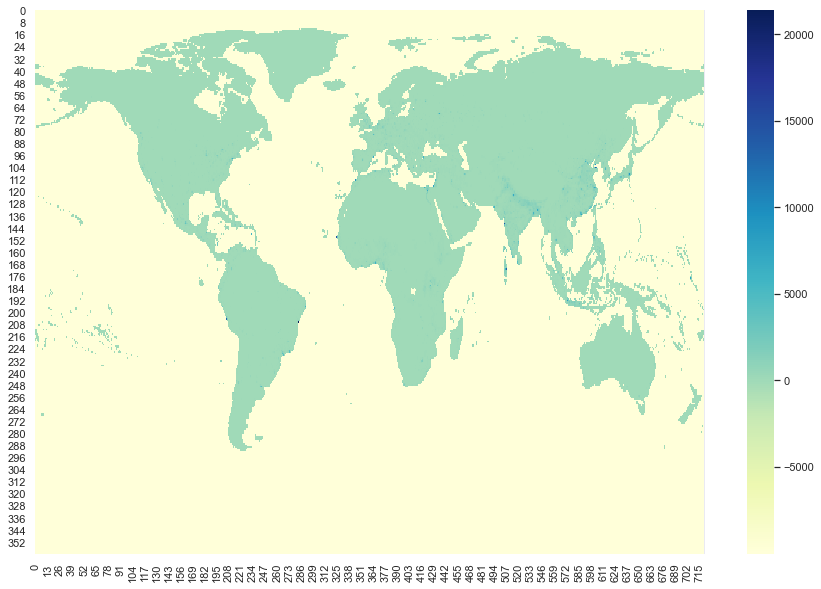

In [4]:
density2015 = pd.read_csv('Data/gpw_v4_population_density_rev11_2015_30_min .asc', sep=' ', header=None)
sns.heatmap(density2015, cmap='YlGnBu')

In [6]:
to_nearest_half = lambda x: int(x)+0.5 if x-int(x) > 0.5 else int(x)
array_loc = wildfire[['LATITUDE', 'LONGITUDE']]
array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(to_nearest_half)
array_loc['LONGITUDE'] = array_loc['LONGITUDE'].apply(to_nearest_half)
array_loc[['LATITUDE', 'LONGITUDE']]

/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/1697708642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(to_nearest_half)
/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/1697708642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LONGITUDE'] = array_loc['LONGITUDE'].apply(to_nearest_half)


,LATITUDE,LONGITUDE
0,60.0,-149
1,60.0,-149
2,60.5,-149
3,60.0,-149
4,60.0,-149
...,...,...
370340,40.0,-122
370341,37.5,-120
370342,37.5,-120
370343,37.5,-120


In [7]:
array_loc['LATITUDE']=array_loc['LATITUDE'].apply(lambda x:int(179-x*2))
array_loc['LONGITUDE']=array_loc['LONGITUDE'].apply(lambda x:int(359+x*2))

def map_density(x):
    # density =pop_density.iloc[x[0],x[1]]
    
    # return pop_density.iloc[x[0],x[1]]
    v2010 = density2010.iloc[x[0],x[1]]
    v2015 = density2015.iloc[x[0],x[1]]
    if v2010 != -9999.0 and v2015 != -9999.0:
        return (v2010 + v2015)/2
    elif v2010 == -9999.0 and v2015 != -9999.0:
        return v2015
    elif v2010 != -9999.0 and v2015 == -9999.0:
        return v2010
    else:
        return -9999.0

array_loc['pop_density'] = array_loc[['LATITUDE', 'LONGITUDE']].apply(map_density, 1)
array_loc

/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/53775832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE']=array_loc['LATITUDE'].apply(lambda x:int(179-x*2))
/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/53775832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LONGITUDE']=array_loc['LONGITUDE'].apply(lambda x:int(359+x*2))
/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/53775832.py:19: SettingWithCopyWarning: 
A valu

,LATITUDE,LONGITUDE,pop_density
0,59,61,4.300180
1,59,61,4.300180
2,58,61,1.656192
3,59,61,4.300180
4,59,61,4.300180
...,...,...,...
370340,99,115,34.811390
370341,104,119,15.899820
370342,104,119,15.899820
370343,104,119,15.899820


In [8]:
wildfire['population_density'] = array_loc['pop_density']
wildfire

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,population_density
0,1453965,20020059,FS-1496314,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,60.246389,-149.349444,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x0042\x1b\xa6.\xabb\xc0...,4.300180
1,1453966,20020060,FS-1496318,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,60.475833,-149.752500,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\xadG\xe1z\x14\xb8b\...,4.300180
2,1453967,20020061,FS-1496319,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,60.514444,-149.467500,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00(\\\x8f\xc2\xf5\xaeb...,1.656192
3,1453968,20020062,FS-1496321,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,60.399722,-149.360833,13.0,STATE OR PRIVATE,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\x03\xf5V\xf2\x8b\xa...,4.300180
4,1453969,20020063,FS-1496322,FED,FS-FIRESTAT,FS,USAKCGF,Chugach National Forest,1004,Chugach National Forest,...,60.467500,-149.973056,5.0,USFS,AK,None,None,None,b'\x00\x01\xad\x10\x00\x00\x82\xeciE#\xbfb\xc0...,4.300180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370340,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...,34.811390
370341,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,15.899820
370342,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...,15.899820
370343,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...,15.899820


## Heatmap of population density at wildfire location

/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_53395/3600036086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(lambda x: -x)


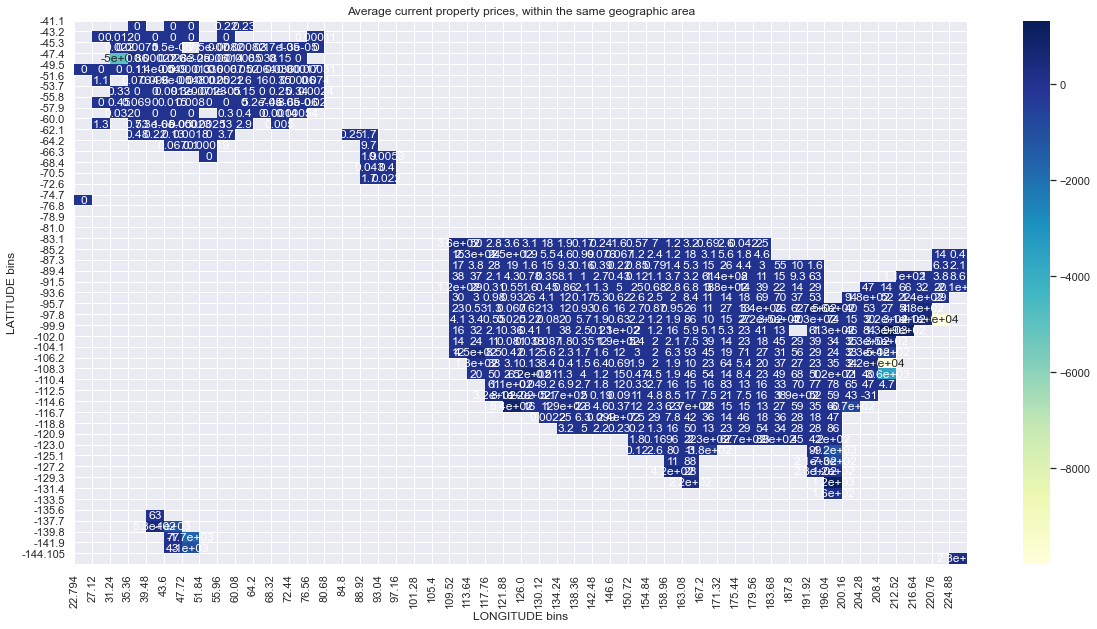

In [9]:
field = 'pop_density'
fieldsxy = ['LONGITUDE', 'LATITUDE']
ncuts = 50
array_loc['LATITUDE'] = array_loc['LATITUDE'].apply(lambda x: -x)
with plt.rc_context({'figure.figsize': (20,10)}):    
    means = heatmap_bins(array_loc, fieldsxy, ncuts)  
    sns.heatmap(means[field], annot=True, cmap='YlGnBu')
    xticklabels = means[field].columns.map(lambda x : x.left)
    yticklabels = means[field].index.map(lambda x : x.left)
    locs = range(ncuts)
    plt.title('average current property prices, within the same geographic area'.capitalize())
    plt.xticks(locs, xticklabels)
    plt.yticks(locs, yticklabels)
    plt.grid()
    plt.show()